# Week 1 & 2 Assignment

Name: Kesav Adithya Venkidusamy<br>
Course: DSC640 - Data Presentation and Visualization<br>
Instructor: Catherine Williams<br>

These two weeks we are going to be focused on bar charts, stacked bar charts, pie charts, donut charts, and line charts using various tools to create these visualizations. Since the course is structured in 2-week blocks, every 2 weeks are going to be focused on a different visualization type that you create in various tools. This is to get you familiar with the pros-cons of Python, R, Tableau, and PowerBI – all tools you are going to run into in the real world, but that all have their own set of pros/cons. The book will cover one way to create a visualization, but we all know we have many tools at our disposal, so throughout these exercises you will be challenged to learn a variety of ways. Follow the recommendations and suggestions from your book on the design and use videos and other sources to find various ways to build the same visualizations.

You will be provided datasets, but you are welcome to use any data you like.  You must consolidate all the charts into ONE document with each chart labeled with the type of chart and technology - for example: Python - Bar Chart.  Failure to label and consolidate the charts will resort in points being taken off or a 0 for the assignment.

To get started, you are going to need to install some things, like R and Python (you likely already have these). You do not need to install all of these in Weeks 1 & 2 – you can decide to wait and install after you determine what you are going to use each week, but ultimately you will need at least one visualization tool like PowerBI or Tableau (can be something different if you have more experience) and then the ability to create visualizations using Python and R – you can pick which package you create them in. Not every visualization will be possible in one package, you will likely have to use multiple packages/libraries to get the job done.

#### 1 bar chart, 1 stacked bar chart, 1 pie chart, 1 donut, and 1 line chart with Python

In [3]:
## Importing libraries required for this exercise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### 1. Bar Chart

In [40]:
## Load the dataset into dataframe
hotdog_df = pd.read_excel("hotdog-contest-winners.xlsm")
hotdog_df.head()

,Year,Winner,Dogs eaten,Country,New record
0,1980,Paul Siederman & Joe Baldini,9.1,United States,0
1,1981,Thomas DeBerry,11.0,United States,0
2,1982,Steven Abrams,11.0,United States,0
3,1983,Luis Llamas,19.5,Mexico,0
4,1984,Birgit Felden,9.5,Germany,0


In [41]:
## Update the column names to make it easier to use
hotdog_df.rename(columns = {'Dogs eaten':'Dogs_eaten'}, inplace = True)
hotdog_df.rename(columns = {'New record':'New_record'}, inplace = True)
hotdog_df.head()

,Year,Winner,Dogs_eaten,Country,New_record
0,1980,Paul Siederman & Joe Baldini,9.1,United States,0
1,1981,Thomas DeBerry,11.0,United States,0
2,1982,Steven Abrams,11.0,United States,0
3,1983,Luis Llamas,19.5,Mexico,0
4,1984,Birgit Felden,9.5,Germany,0


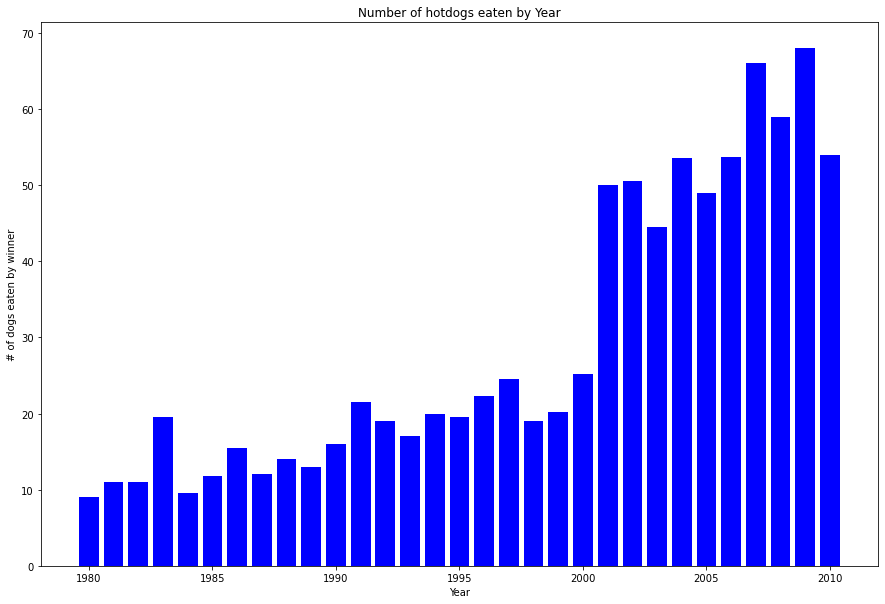

In [42]:
## Plotting bar chart for Year vs Dogs eaten
plt.figure(figsize=(15,10))
plt.bar(hotdog_df.Year, hotdog_df.Dogs_eaten, color = 'blue')
plt.xlabel("Year")
plt.ylabel("# of dogs eaten by winner")
plt.title("Number of hotdogs eaten by Year")
plt.show()

##### 2. Stacked Bar Chart

In [24]:
# For this exercise I have considered the hotdog-places file
hdp_df = pd.read_excel("hotdog-places.xlsm")
hdp_df.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,25,50.0,50.5,44.5,53.5,49,54,66,59,68.0,54
1,24,31.0,26.0,30.5,38.0,37,52,63,59,64.5,43
2,22,23.5,25.5,29.5,32.0,32,37,49,42,55.0,37


In [25]:
## Adding a field "Year" and place name for each row
hdp_df['Year'] = ['Chicago','Texas','New_York']
hdp_df = hdp_df.set_index('Year')
hdp_df.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Year,,,,,,,,,,,
Chicago,25,50.0,50.5,44.5,53.5,49,54,66,59,68.0,54
Texas,24,31.0,26.0,30.5,38.0,37,52,63,59,64.5,43
New_York,22,23.5,25.5,29.5,32.0,32,37,49,42,55.0,37


In [26]:
## Taking transpose of the dataframe
##hdp_df = hdp_df.set_index('Year').T.rename_axis(None, 1).rename_axis('Year').reset_index()
hdp_df = hdp_df.transpose()
hdp_df.reset_index()
hdp_df.head()

Year,Chicago,Texas,New_York
2000,25.0,24.0,22.0
2001,50.0,31.0,23.5
2002,50.5,26.0,25.5
2003,44.5,30.5,29.5
2004,53.5,38.0,32.0


In [27]:
## Adding index as separate column
hdp_df['Year'] = hdp_df.index
hdp_df.head()

Year,Chicago,Texas,New_York,Year
2000,25.0,24.0,22.0,2000
2001,50.0,31.0,23.5,2001
2002,50.5,26.0,25.5,2002
2003,44.5,30.5,29.5,2003
2004,53.5,38.0,32.0,2004


In [28]:
## Printng the colums and dtypes
hdp_df.dtypes

Year
Chicago     float64
Texas       float64
New_York    float64
Year         object
dtype: object

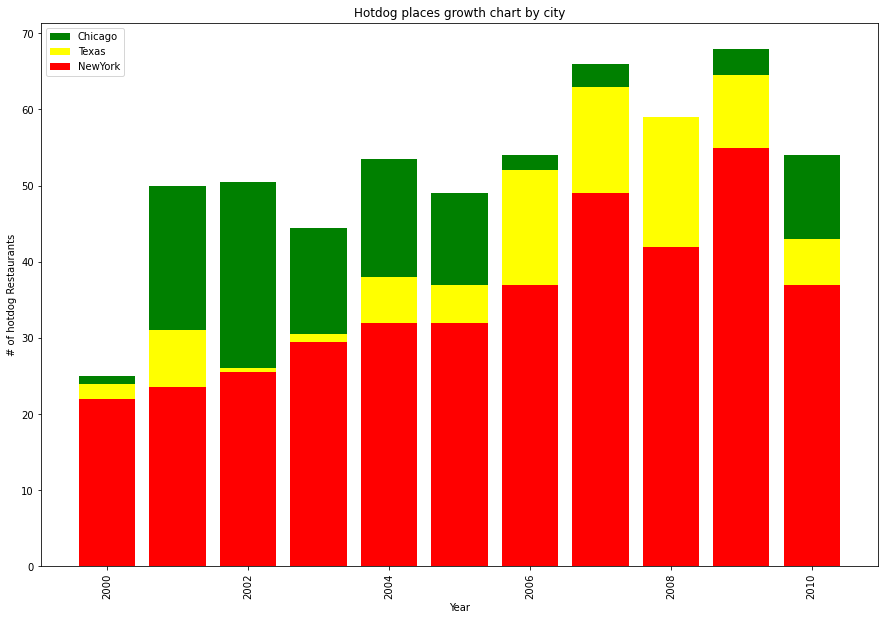

In [38]:
## Plotting the stacked bar charts
plt.figure(figsize=(15,10))
plt.bar(hdp_df.Year, hdp_df.Chicago, label = 'Chicago', color = 'green')
plt.bar(hdp_df.Year, hdp_df.Texas, label = 'Texas', color = 'yellow')
plt.bar(hdp_df.Year, hdp_df.New_York, label = 'NewYork', color = 'red')
plt.xlabel("Year")
plt.ylabel("# of hotdog Restaurants")
plt.legend(loc = 'upper left')
plt.xticks(rotation = 90, fontsize = 10)
plt.title('Hotdog places growth chart by city')
plt.show()

##### 3. Pie Chart

In [44]:
## We will use first dataframe to plot Pie chart
## Creating total number of Dogs eaten by country
hd_cnty_df = hotdog_df[['Dogs_eaten','Country']]
hd_cnty_df.head()

,Dogs_eaten,Country
0,9.1,United States
1,11.0,United States
2,11.0,United States
3,19.5,Mexico
4,9.5,Germany


In [45]:
## Calculate the total by country
hd_cnty_df2 = hd_cnty_df.groupby('Country').sum()
hd_cnty_df2.head()

,Dogs_eaten
Country,
Germany,9.50
Japan,369.88
Mexico,19.50
United States,499.85


Text(0.5, 1.0, 'Total Hotdog eaten by Country')

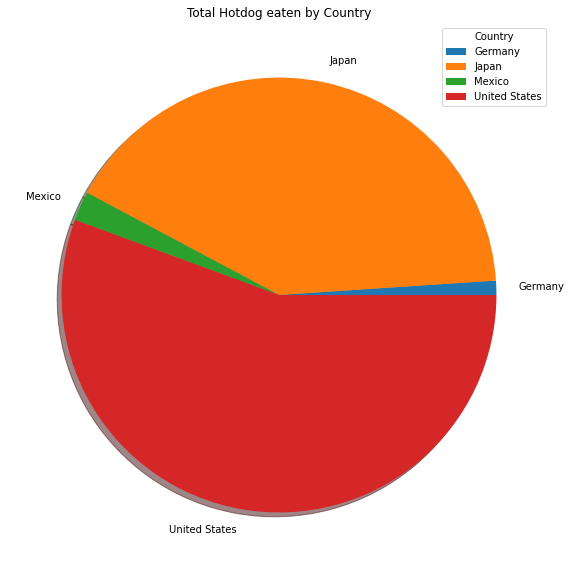

In [55]:
## Plot pie chart based on the above calculated values
plt.figure(figsize=(15,10))
plt.pie(hd_cnty_df2.Dogs_eaten, labels = hd_cnty_df2.index, shadow=True)
plt.legend(title = "Country")
plt.title('Total Hotdog eaten by Country')

##### 4. Donut Chart

For Donut Chart also, we will consider Hog eatens dataset; Here, I have created a sub dataframe with sum of Hog dog eaten by country

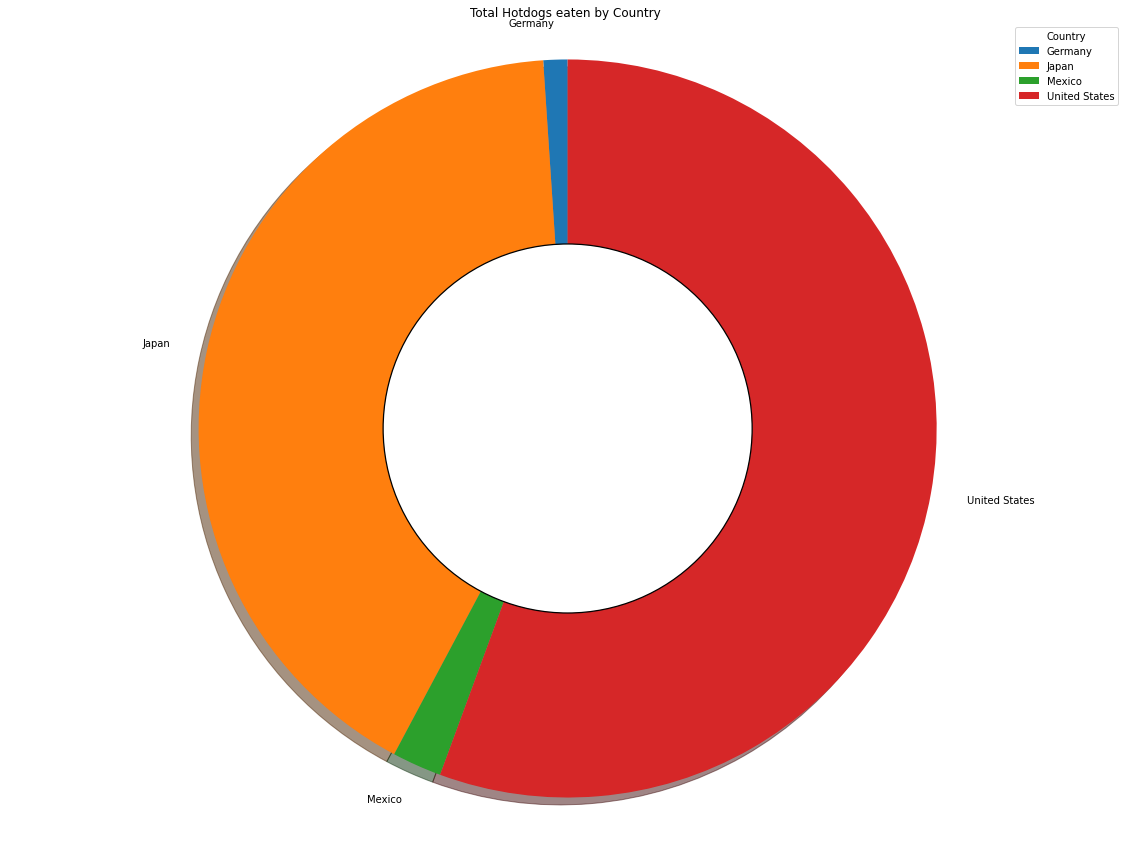

In [58]:
## Plotting Donut chart
fig, ax1 = plt.subplots(figsize=(20, 15))
ax1.pie(hd_cnty_df2.Dogs_eaten, labels = hd_cnty_df2.index,shadow=True, startangle=90)

#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Total Hotdogs eaten by Country')
plt.legend(title = "Country")
plt.show()

##### 5. Line Chart

For this chart, we will consider the number of hot dogs eaten by year. From the dataset, we will consider the columns Year and number of hog dogs eaten. 

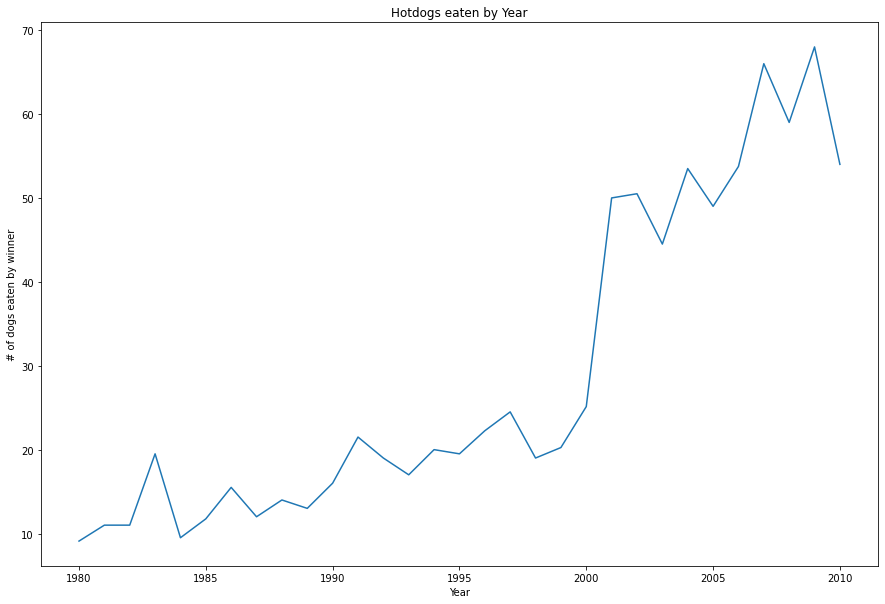

In [68]:
# plot a line graph
plt.figure(figsize=(15, 10))
plt.plot(hotdog_df["Year"], hotdog_df["Dogs_eaten"])
plt.title('Hotdogs eaten by Year')
plt.xlabel("Year")
plt.ylabel("# of dogs eaten by winner")
plt.show()